In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_svmlight_file

%matplotlib inline
sns.set()

In [2]:
X_train, y_train = load_svmlight_file('satimage.scale.tr')
X_test, y_test = load_svmlight_file('satimage.scale.t')

In [3]:
X_train = pd.DataFrame(X_train.todense())
X_test = pd.DataFrame(X_test.todense())

In [4]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0000,0.127273,-0.095238,-0.289256,0.032258,0.054545,-0.157895,-0.265625,-0.2500,-0.106796,...,-0.517241,-0.600000,-0.138462,-0.188119,-0.431579,-0.546875,-0.15625,-0.126214,-0.431579,-0.484375
1,0.0000,-0.090909,-0.571429,-0.603306,-0.096774,-0.090909,-0.494737,-0.562500,-0.2500,-0.106796,...,-0.517241,-0.600000,-0.015385,-0.049505,-0.431579,-0.609375,-0.15625,-0.126214,-0.494737,-0.609375
2,0.5625,0.490909,0.333333,-0.074380,0.354839,0.327273,0.052632,-0.187500,0.1875,0.242718,...,0.103448,-0.233333,0.200000,0.207921,-0.010526,-0.312500,-0.15625,0.009709,-0.326316,-0.437500
3,0.0000,-0.018182,-0.380952,-0.471074,-0.225806,-0.163636,-0.410526,-0.437500,-0.3750,-0.242718,...,-0.011494,-0.383333,-0.138462,-0.049505,-0.347368,-0.484375,0.09375,0.087379,-0.031579,-0.218750
4,0.0000,-0.018182,-0.285714,-0.471074,0.032258,-0.090909,-0.326316,-0.500000,-0.1250,-0.184466,...,0.287356,-0.183333,0.230769,0.267327,-0.031579,-0.281250,-0.03125,-0.126214,-0.431579,-0.546875


In [5]:
X_train.shape

(3104, 36)

In [6]:
X_train.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
dtype: int64

In [7]:
X_test.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
dtype: int64

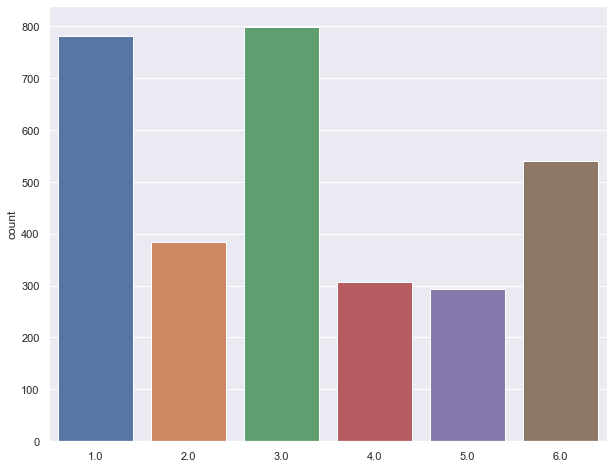

In [8]:
### Class distribution
plt.figure(figsize = (10, 8))
sns.countplot(x = y_train)
plt.show()

**The dataset is obviously imbalanced. Measures will have to be put in place to correct this.**

In [9]:
X_train.skew()

0    -0.028141
1    -0.750136
2    -0.236378
3     0.866330
4    -0.003495
5    -0.723190
6    -0.241706
7     0.867021
8     0.014771
9    -0.718096
10   -0.228703
11    0.896264
12   -0.039082
13   -0.779954
14   -0.267230
15    0.855826
16   -0.035633
17   -0.761381
18   -0.249217
19    0.875767
20   -0.012425
21   -0.747521
22   -0.247138
23    0.864411
24   -0.036649
25   -0.781601
26   -0.267431
27    0.872175
28   -0.033621
29   -0.780449
30   -0.260670
31    0.870618
32   -0.013529
33   -0.766032
34   -0.248784
35    0.872776
dtype: float64

In [10]:
X_test.skew()

0    -0.016321
1    -0.693995
2    -0.138678
3     0.918450
4    -0.013311
5    -0.684111
6    -0.125169
7     0.914798
8     0.002344
9    -0.667417
10   -0.088816
11    0.925144
12    0.023491
13   -0.672022
14   -0.118235
15    0.895181
16    0.044791
17   -0.663115
18   -0.137203
19    0.851022
20    0.044430
21   -0.648783
22   -0.109896
23    0.905146
24    0.030323
25   -0.678542
26   -0.096198
27    0.904692
28    0.055831
29   -0.653165
30   -0.097001
31    0.879825
32    0.062961
33   -0.630316
34   -0.066534
35    0.915519
dtype: float64

In [11]:
X_train.corr()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.000000,0.811794,0.210375,-0.192272,0.954509,0.772329,0.187864,-0.202205,0.889532,0.714196,...,0.176996,-0.184444,0.864706,0.710435,0.153522,-0.201117,0.834999,0.680377,0.134163,-0.200901
1,0.811794,1.000000,0.338098,-0.153539,0.794755,0.959417,0.316304,-0.164433,0.737432,0.890008,...,0.284935,-0.149370,0.693969,0.862166,0.270943,-0.162898,0.677136,0.842185,0.257044,-0.161109
2,0.210375,0.338098,1.000000,0.850775,0.212138,0.327331,0.931103,0.796239,0.188623,0.294877,...,0.782514,0.672506,0.149865,0.272786,0.780291,0.669933,0.138343,0.262741,0.749323,0.639791
3,-0.192272,-0.153539,0.850775,1.000000,-0.185028,-0.148390,0.816907,0.940154,-0.182637,-0.147123,...,0.674601,0.783476,-0.192707,-0.149221,0.680759,0.790582,-0.199881,-0.153549,0.654075,0.759356
4,0.954509,0.794755,0.212138,-0.185028,1.000000,0.815195,0.215217,-0.196286,0.956357,0.783299,...,0.177790,-0.174149,0.865250,0.716438,0.165439,-0.191256,0.863386,0.713410,0.151341,-0.202792
5,0.772329,0.959417,0.327331,-0.148390,0.815195,1.000000,0.336468,-0.162649,0.795312,0.961289,...,0.281128,-0.138542,0.683178,0.856206,0.278299,-0.150569,0.692457,0.866118,0.272349,-0.159310
6,0.187864,0.316304,0.931103,0.816907,0.215217,0.336468,1.000000,0.846610,0.207306,0.320485,...,0.763137,0.659272,0.146346,0.269485,0.784352,0.677340,0.140675,0.266483,0.784096,0.679304
7,-0.202205,-0.164433,0.796239,0.940154,-0.196286,-0.162649,0.846610,1.000000,-0.196416,-0.163405,...,0.655274,0.765903,-0.192804,-0.151017,0.679749,0.793179,-0.205007,-0.162026,0.684257,0.802182
8,0.889532,0.737432,0.188623,-0.182637,0.956357,0.795312,0.207306,-0.196416,1.000000,0.817721,...,0.168260,-0.170933,0.844530,0.697543,0.161624,-0.185487,0.863929,0.713594,0.155787,-0.198036
9,0.714196,0.890008,0.294877,-0.147123,0.783299,0.961289,0.320485,-0.163405,0.817721,1.000000,...,0.264448,-0.137339,0.660076,0.830894,0.269066,-0.147311,0.686787,0.859130,0.271160,-0.155670


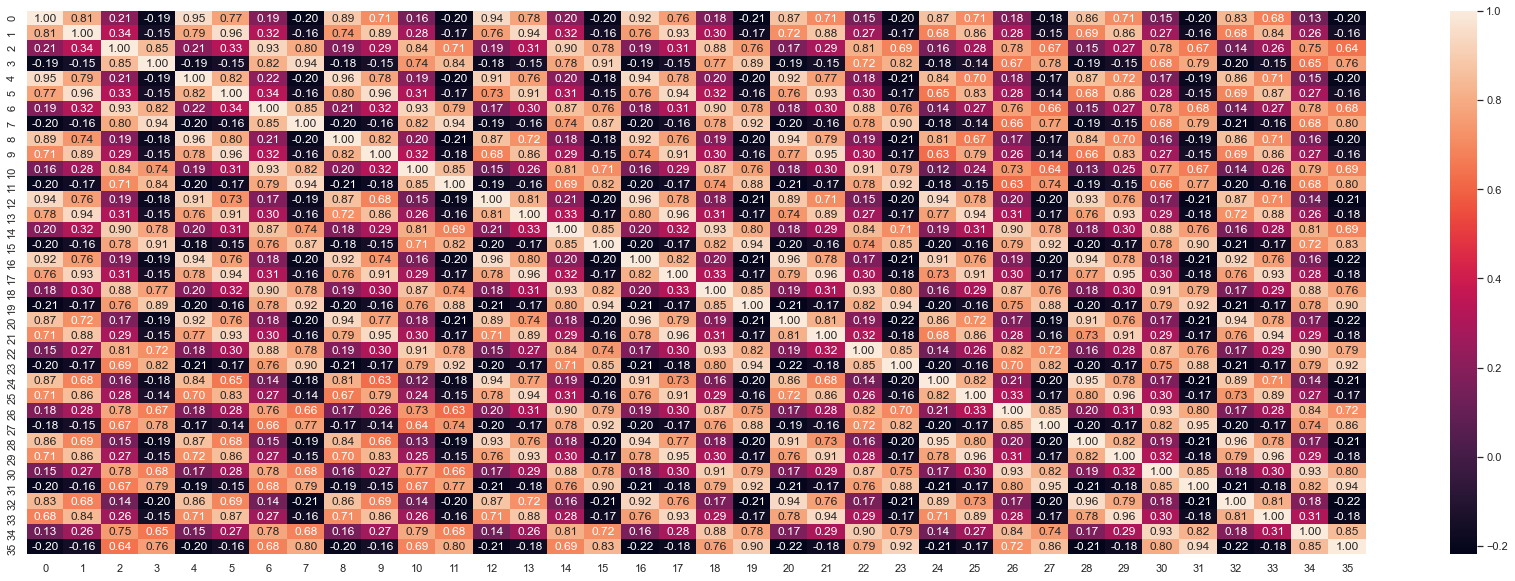

In [12]:
plt.figure(figsize = (30, 30))
sns.heatmap(X_train.corr(), fmt = '.2f', annot = True)
plt.show()

In [13]:
corr_dict = {}
for i in X_train.columns:
    for j in X_train.columns:
        if i == j:
            continue
        else:
            corr_dict['Feature' + str(i) + '_with_' + 'Feature' + str(j)] = np.corrcoef(X_train[i], X_train[j])[0, 1]

In [14]:
len(corr_dict)

1260

In [15]:
new_corr_dict = {}
for k,v in corr_dict.items():
    if round(v, 11) in new_corr_dict.values():
        continue
    else:
        new_corr_dict[k] = round(v, 11)

In [16]:
len(new_corr_dict)

630

In [17]:
dict_keys = list(new_corr_dict.keys())
dict_values = list(new_corr_dict.values())

In [18]:
zip_list = []
for z in zip(dict_keys, dict_values):
    zip_list.append(z)

In [19]:
zip_list = sorted(zip_list, key = lambda x: x[1], reverse = True)

In [20]:
zip_list

[('Feature5_with_Feature9', 0.96128898629),
 ('Feature29_with_Feature33', 0.96122879881),
 ('Feature17_with_Feature21', 0.96064823265),
 ('Feature13_with_Feature17', 0.96058205567),
 ('Feature25_with_Feature29', 0.95987377745),
 ('Feature1_with_Feature5', 0.9594171228),
 ('Feature4_with_Feature8', 0.95635730003),
 ('Feature12_with_Feature16', 0.95616033308),
 ('Feature16_with_Feature20', 0.95581173199),
 ('Feature28_with_Feature32', 0.95524367682),
 ('Feature24_with_Feature28', 0.95467534427),
 ('Feature0_with_Feature4', 0.95450938558),
 ('Feature17_with_Feature29', 0.94644788773),
 ('Feature9_with_Feature21', 0.9460352418),
 ('Feature27_with_Feature31', 0.94554754417),
 ('Feature13_with_Feature25', 0.9442690779),
 ('Feature31_with_Feature35', 0.94391156113),
 ('Feature21_with_Feature33', 0.94371537242),
 ('Feature15_with_Feature19', 0.94207774639),
 ('Feature19_with_Feature23', 0.94196036317),
 ('Feature8_with_Feature20', 0.94193159548),
 ('Feature5_with_Feature17', 0.94164908271),
 (

<b>The train dataset exhibits significant levels of class imbalance. This will be rectified using the `SMOTE` object from the `imblearn` library. As can be seen from analysis above, the dataset contains a considerable number of features, and a large number of them seem to be well-correlated. We will attempt to smoothen out this effect by principal component analysis using `sklearn`'s `PCA` class.
    
The large number of features available increases the possibility of blurring across the class boundaries. We will attempt to cater for this possibility by utilizing the `NearMiss` class for undersampling purposes.<b/>

In [21]:
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline
from imblearn import ensemble

In [23]:
dir(ensemble)

['BalancedBaggingClassifier',
 'BalancedRandomForestClassifier',
 'EasyEnsembleClassifier',
 'RUSBoostClassifier',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bagging',
 '_easy_ensemble',
 '_forest',
 '_weight_boosting']

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [25]:
rus_boost = ensemble.RUSBoostClassifier(n_estimators = 100, learning_rate = 0.01)

In [26]:
rus_boost.fit(X_train, y_train)

RUSBoostClassifier(learning_rate=0.01, n_estimators=100)

In [27]:
print(classification_report(y_test, rus_boost.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.90      0.75      0.82       461
         2.0       0.99      0.82      0.90       224
         3.0       0.91      0.80      0.85       397
         4.0       0.39      0.70      0.50       211
         5.0       0.83      0.61      0.70       237
         6.0       0.66      0.74      0.70       470

    accuracy                           0.74      2000
   macro avg       0.78      0.74      0.74      2000
weighted avg       0.79      0.74      0.76      2000



In [28]:
log_reg = LogisticRegression(max_iter = 5000, C = 2.0)

In [29]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=2.0, max_iter=5000)

In [30]:
print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       461
         2.0       0.93      0.94      0.94       224
         3.0       0.85      0.94      0.89       397
         4.0       0.51      0.36      0.43       211
         5.0       0.83      0.72      0.77       237
         6.0       0.77      0.83      0.80       470

    accuracy                           0.84      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.83      0.84      0.83      2000



In [31]:
pca = PCA()
sampler = SMOTE()
near_miss = NearMiss(version = 1)

In [32]:
log_pipe = Pipeline(steps = [('sampler', sampler),
                             ('near_miss', near_miss),
                             ('pca', pca),
                             ('model', log_reg)
                            ])


In [33]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('sampler', SMOTE()), ('near_miss', NearMiss()), ('pca', PCA()),
                ('model', LogisticRegression(C=2.0, max_iter=5000))])

In [34]:
print(classification_report(y_train, log_pipe.predict(X_train)))

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       781
         2.0       0.98      0.96      0.97       384
         3.0       0.93      0.90      0.91       798
         4.0       0.57      0.72      0.64       306
         5.0       0.83      0.87      0.85       294
         6.0       0.88      0.80      0.84       541

    accuracy                           0.89      3104
   macro avg       0.86      0.87      0.86      3104
weighted avg       0.90      0.89      0.89      3104



In [35]:
print(classification_report(y_test, log_pipe.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       461
         2.0       0.95      0.94      0.94       224
         3.0       0.90      0.85      0.87       397
         4.0       0.50      0.67      0.57       211
         5.0       0.81      0.81      0.81       237
         6.0       0.86      0.78      0.82       470

    accuracy                           0.85      2000
   macro avg       0.83      0.84      0.83      2000
weighted avg       0.86      0.85      0.85      2000



In [36]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from skopt import BayesSearchCV

In [37]:
param_grid = {'pca__n_components' : [15, 20, 25, 30],
              'near_miss__n_neighbors' : [3, 4, 5, 6, 7],
              'model__C' :[1.0, 1.5, 2.0, 2.5],
              'model__solver' : ['lbfgs', 'saga', 'newton-cg', 'liblinear']
             }
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3)

<b>Optimization with BayesSearchCV class object from skopt</b>

In [38]:
bayes_grid = BayesSearchCV(estimator = log_pipe, search_spaces = param_grid, n_iter = 100,
                           scoring = 'f1_macro', n_jobs = -1, cv = cv, return_train_score = True)

In [39]:
bayes_grid.fit(X_train, y_train)

C:\Users\PROBOOK\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\PROBOOK\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\PROBOOK\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\PROBOOK\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\PROBOOK\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Us

BayesSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
              estimator=Pipeline(steps=[('sampler', SMOTE()),
                                        ('near_miss', NearMiss()),
                                        ('pca', PCA()),
                                        ('model',
                                         LogisticRegression(C=2.0,
                                                            max_iter=5000))]),
              n_iter=100, n_jobs=-1, return_train_score=True,
              scoring='f1_macro',
              search_spaces={'model__C': [1.0, 1.5, 2.0, 2.5],
                             'model__solver': ['lbfgs', 'saga', 'newton-cg',
                                               'liblinear'],
                             'near_miss__n_neighbors': [3, 4, 5, 6, 7],
                             'pca__n_components': [15, 20, 25, 30]})

In [40]:
bayes_scores = bayes_grid.cv_results_

In [41]:
bayes_grid.best_params_

OrderedDict([('model__C', 2.5),
             ('model__solver', 'newton-cg'),
             ('near_miss__n_neighbors', 6),
             ('pca__n_components', 20)])

In [42]:
bayes_grid.best_score_

0.8400034728291966

In [43]:
print(f'Mean train f1-score: {np.mean(bayes_scores["mean_train_score"])} \
\nMean test f1-score: {np.mean(bayes_scores["mean_test_score"])}')

Mean train f1-score: 0.8528485235443416 
Mean test f1-score: 0.8346794569012884


In [44]:
best_bayes = bayes_grid.best_estimator_

In [45]:
bayes_grid.best_params_

OrderedDict([('model__C', 2.5),
             ('model__solver', 'newton-cg'),
             ('near_miss__n_neighbors', 6),
             ('pca__n_components', 20)])

In [46]:
print(classification_report(y_train, best_bayes.predict(X_train)))

              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97       781
         2.0       0.97      0.97      0.97       384
         3.0       0.93      0.89      0.91       798
         4.0       0.54      0.71      0.61       306
         5.0       0.82      0.84      0.83       294
         6.0       0.87      0.78      0.82       541

    accuracy                           0.88      3104
   macro avg       0.85      0.86      0.85      3104
weighted avg       0.89      0.88      0.88      3104



In [47]:
print(classification_report(y_test, best_bayes.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       461
         2.0       0.93      0.94      0.94       224
         3.0       0.90      0.85      0.88       397
         4.0       0.50      0.67      0.57       211
         5.0       0.81      0.79      0.80       237
         6.0       0.85      0.77      0.81       470

    accuracy                           0.84      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.86      0.84      0.85      2000



**Refitting the best estimator on the entire train set**

In [48]:
best_bayes.fit(X_train, y_train)

Pipeline(steps=[('sampler', SMOTE()), ('near_miss', NearMiss(n_neighbors=6)),
                ('pca', PCA(n_components=20)),
                ('model',
                 LogisticRegression(C=2.5, max_iter=5000, solver='newton-cg'))])

In [49]:
print(classification_report(y_train, best_bayes.predict(X_train)))

              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       781
         2.0       0.98      0.97      0.97       384
         3.0       0.93      0.88      0.91       798
         4.0       0.55      0.72      0.62       306
         5.0       0.83      0.84      0.83       294
         6.0       0.87      0.79      0.83       541

    accuracy                           0.88      3104
   macro avg       0.86      0.86      0.86      3104
weighted avg       0.89      0.88      0.88      3104



In [50]:
print(classification_report(y_test, best_bayes.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       461
         2.0       0.94      0.95      0.94       224
         3.0       0.91      0.84      0.87       397
         4.0       0.50      0.68      0.58       211
         5.0       0.82      0.81      0.81       237
         6.0       0.86      0.78      0.82       470

    accuracy                           0.85      2000
   macro avg       0.83      0.84      0.83      2000
weighted avg       0.86      0.85      0.85      2000



****Optimization with regular sklearn GridSearch object****

In [51]:
grid = GridSearchCV(estimator = log_pipe, scoring = 'f1_macro', cv = cv,
                    n_jobs = -1, return_train_score = True, param_grid = param_grid)

In [52]:
grid.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('sampler', SMOTE()),
                                       ('near_miss', NearMiss()),
                                       ('pca', PCA()),
                                       ('model',
                                        LogisticRegression(C=2.0,
                                                           max_iter=5000))]),
             n_jobs=-1,
             param_grid={'model__C': [1.0, 1.5, 2.0, 2.5],
                         'model__solver': ['lbfgs', 'saga', 'newton-cg',
                                           'liblinear'],
                         'near_miss__n_neighbors': [3, 4, 5, 6, 7],
                         'pca__n_components': [15, 20, 25, 30]},
             return_train_score=True, scoring='f1_macro')

In [53]:
scores = grid.cv_results_

In [54]:
grid.best_params_

{'model__C': 2.5,
 'model__solver': 'lbfgs',
 'near_miss__n_neighbors': 3,
 'pca__n_components': 25}

* It would appear that the best hyperparameters for the pipeline are:
    * KernelPCA
        * kernel : 'rbf'
        * n_components : 30
    * LogisticRegression
        * C : 2.5
        * solver : 'newton-cg'

In [55]:
grid.best_score_

0.8390783608218528

In [56]:
print(f'Mean train f1-score: {np.mean(scores["mean_train_score"])} \
\nMean test f1-score: {np.mean(scores["mean_test_score"])}')

Mean train f1-score: 0.8468728607006506 
Mean test f1-score: 0.8287386336489174


In [57]:
best_model = grid.best_estimator_

In [58]:
print(classification_report(y_train, best_model.predict(X_train)))

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       781
         2.0       0.97      0.96      0.97       384
         3.0       0.93      0.89      0.91       798
         4.0       0.54      0.71      0.61       306
         5.0       0.83      0.85      0.84       294
         6.0       0.87      0.79      0.83       541

    accuracy                           0.88      3104
   macro avg       0.86      0.86      0.86      3104
weighted avg       0.89      0.88      0.88      3104



In [59]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       461
         2.0       0.94      0.93      0.93       224
         3.0       0.90      0.84      0.87       397
         4.0       0.50      0.70      0.58       211
         5.0       0.81      0.79      0.80       237
         6.0       0.86      0.77      0.81       470

    accuracy                           0.84      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.86      0.84      0.85      2000



**Scoring the best estimator obtained from GridSearchCV**

In [63]:
f1_score(y_train, best_model.predict(X_train), average = 'macro')

0.856233919188777

In [64]:
f1_score(y_test, best_model.predict(X_test), average = 'macro')

0.8286402223839865

**Refitting the best model on the whole train set and scoring once again**

In [65]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('sampler', SMOTE()), ('near_miss', NearMiss()),
                ('pca', PCA(n_components=25)),
                ('model', LogisticRegression(C=2.5, max_iter=5000))])

In [68]:
f1_score(y_train, best_model.predict(X_train), average = 'macro')

0.8591313255435581

In [69]:
f1_score(y_test, best_model.predict(X_test), average = 'macro')

0.8283011809145933